<h1 style='text-align:center; color: #669CDD'><strong>Ejercicio 1<strong></h1>

Se pueden relacionar las distintas variables del problema como las coordenadas de las anclas ($x_i$, $y_i$), coordenadas del objetivo ($x$, $y$) y los angúlos ($\theta_i$) con la siguiente ecuación:

$$\boxed{x_i - y_i \, \tan(\theta_i) = x - y \, \tan(\theta_i)}$$

---

Los datos obtenidos por medidiciones son los $x_i$, $y_i$ y $\theta_i$, por ende serían las variables observadas, por otro lado, queremos obtener la $x$ e $y$, siendo estas las incógnitas.

Ya que el objetivo es estimar los parámetros del modelo (la posición desconocida $x$ , $y$) partiendo de las observaciones (las posiciones de las anclas $x_i$, $y_i$ y los ángulos medidos $\theta_i$), estamos hablando de un problema inverso. A diferencia de un problema directo, donde se calculan los datos a partir de una posición conocida, en este problema tenemos que inferir la posición que explica de mejor manera los datos recolectados. Si fuese directo, deberiamos calcular los ángulos en base a la posicion ($x$, $y$) conocida.

---

Para resolver el problema por cuadrados mínimos tenemos que obtener la matriz de diseño $X$ y el vector de observaciones $Y$, para poder llegar a

$$\boxed{X \cdot \mathbf{\hat{\beta}} = \mathbf{Y}}$$

Tomando una cantidad arbitraria $M$ de anclas, la matriz de diseño tiene dimensión de $M \times 2$ y es:

$$X = \begin{bmatrix} 1 & -\tan(\theta_1)
                 \\\\ 1 & -\tan(\theta_2) 
                 \\\\ \vdots & \vdots 
                 \\\\ 1 & -\tan(\theta_M)
      \end{bmatrix}$$

por otro lado el vector de observaciones $\mathbf{Y}$ tiene dimensión de $M \times 1$ y es:

$$\mathbf{Y} = \begin{bmatrix} x_1 - y_1 \, \tan(\theta_1)
                          \\\\ x_2 - y_2 \, \tan(\theta_2)
                          \\\\ \vdots
                          \\\\ x_M - y_M \, \tan(\theta_M)
                \end{bmatrix}$$

por último, queda definido el vector de incógnitas $\mathbf{\hat{\beta}}$ de dimensión $2 \times 1$ como:

$$\mathbf{\hat{\beta}} = \begin{bmatrix} x \\\\ y \end{bmatrix}$$

<h1 style='text-align:center; color: #669CDD'><strong>Ejercicio 2<strong></h1>

<h2 style='text-align:center; color:#669CDD;'><strong>Real</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(100.0, 50.0)</strong></h3>

<h2 style='text-align:center; color:#669CDD;'><strong>Predicción</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(100.0, 50.0)</strong></h3>

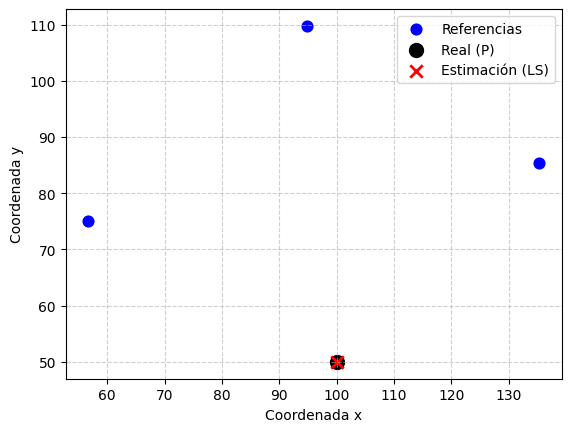

<h2 style='text-align:center; color:#669CDD;'><strong>50 Estimaciones con Ruido - (Δx, Δy ∼ N(0, σ²))</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>σ² = 4</strong></h3>

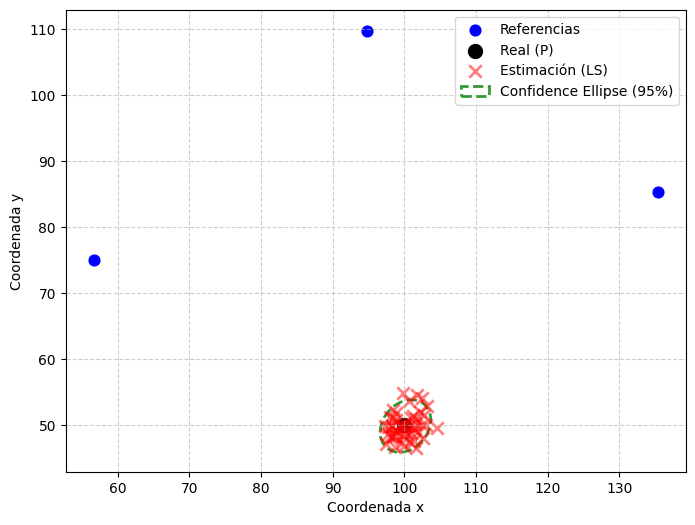

<h3 style='text-align:center; color:#669CDD;'><strong>σ² = 25</strong></h3>

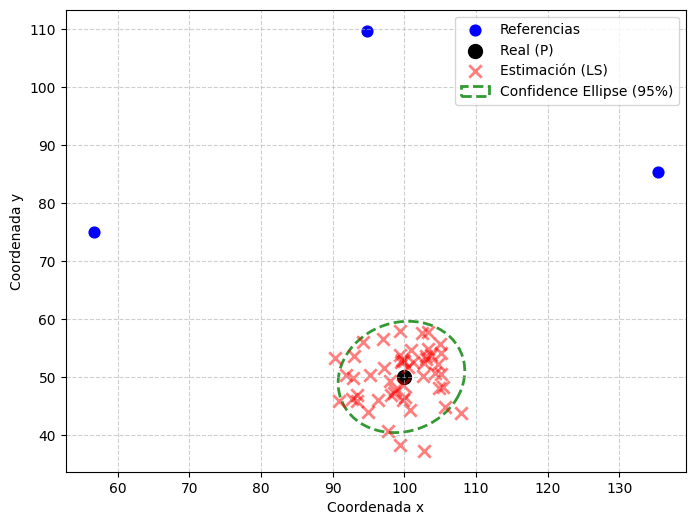

<h3 style='text-align:center; color:#669CDD;'><strong>σ² = 100</strong></h3>

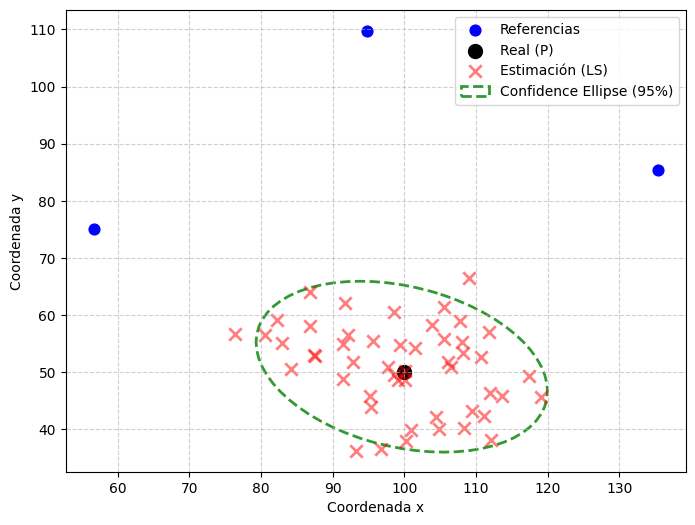

<h2 style='text-align:center; color:#669CDD;'><strong>50 Estimaciones con Ruido - (Δx, Δy ∼ N(0, 4))</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>config_2 - κ = 7.77 < 10 - Bien condicionada</strong></h3>

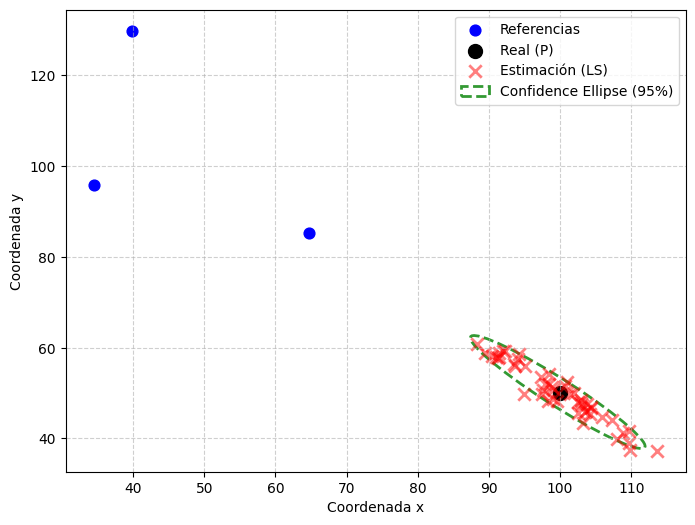

<h3 style='text-align:center; color:#669CDD;'><strong>config_3 - κ = 17.7 > 10 - Mal condicionada</strong></h3>

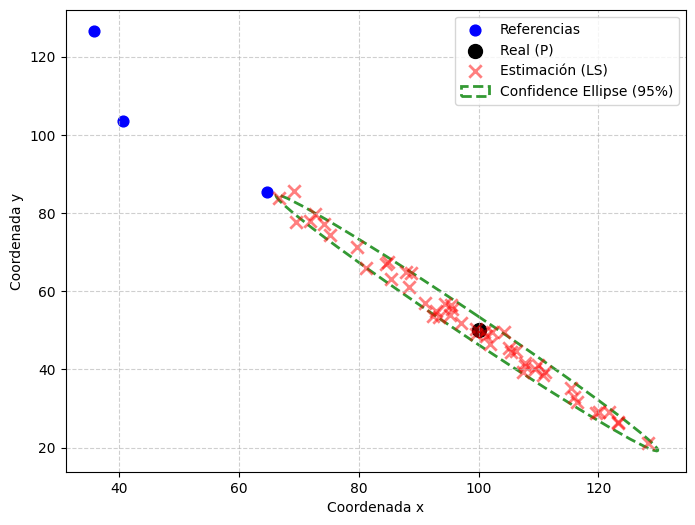

<h3 style='text-align:center; color:#669CDD;'><strong>config_4 - κ = 701.73 > 10 - Mal condicionada</strong></h3>

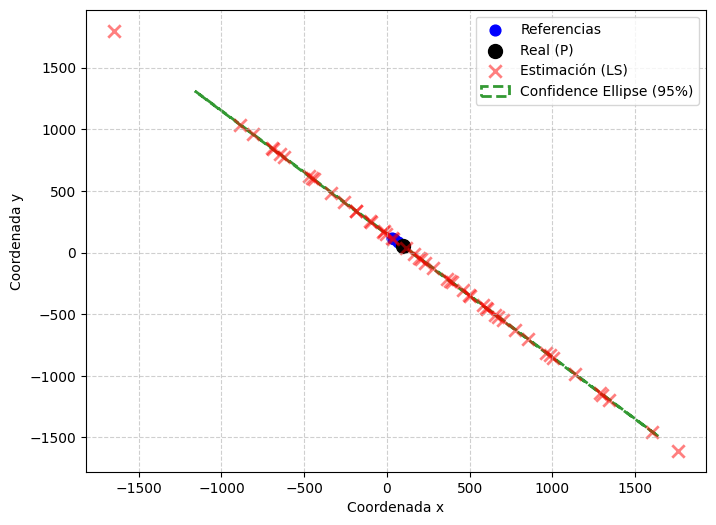

In [3]:
from functions_2 import *

estimate_position()
noisy_estimations()
estimate_positions()

<h2 style='text-align:center; color: #669CDD'><strong>Conclusión<strong></h2>

En la configuración dos (*config_2*), se nota una pérdida de precisión de las estimaciones respecto a la posición real, aunque todavía es aceptable y se acerca en gran medida a la posición esperada. Por otro lado, en las configuraciones tres y cuatro (*config_3*, *config_4*), la pérdida de precisión es considerable frente a perturbaciones, esto es débido al mal condicionamiento de la matriz de diseño, donde ya representa una pérdida de más de un digito

$$\text{Dígitos pérdidos} \approx \log_{10}(\kappa)$$

El mal condicionamiento de la matrices se debe a que los puntos están cerca entre sí y alineados sobre una recta, por lo que la incertidumbre no se distribuye de forma circular, si no que se empieza a aplanar sobre una elipse como se muestra en los gráficos, lo que achata todas las estimaciones sobre el mismo eje donde están concentradas las anclas.

<h2 style='text-align:center; color:#669CDD;'><strong>Real</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(359504.22, 6187260.22)</strong></h3>

<h2 style='text-align:center; color:#669CDD;'><strong>Predicción</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(359502.4, 6187260.94)</strong></h3>

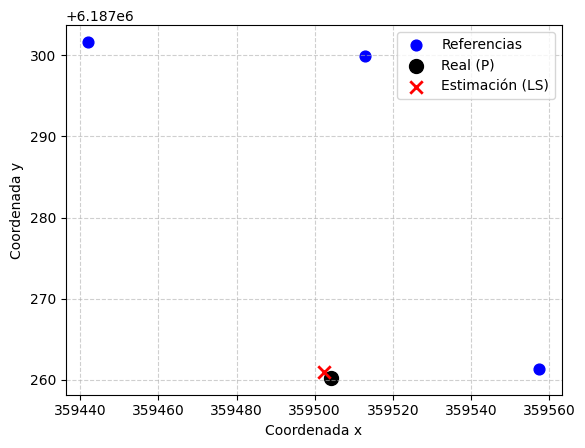

<h2 style='text-align:center; color:#669CDD;'><strong>Real</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(62.2, -41.43)</strong></h3>

<h2 style='text-align:center; color:#669CDD;'><strong>Predicción</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>(60.38, -40.71)</strong></h3>

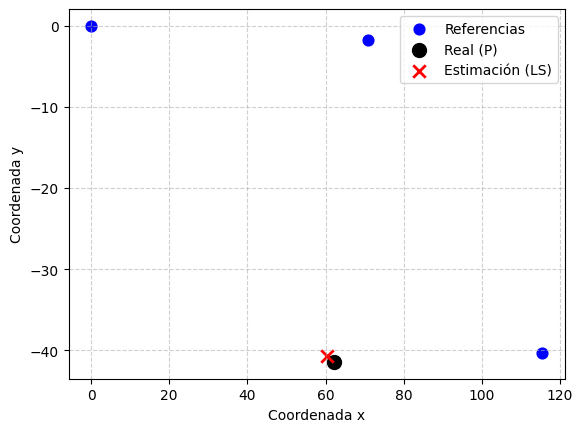

<h2 style='text-align:center; color:#669CDD;'><strong>Error de Localización</strong></h2>

<h3 style='text-align:center; color:#669CDD;'><strong>1.96 metros</strong></h3>

In [4]:
from functions_2 import estimate_position
from functions_3 import POS, REFERENCES
import numpy as np
from utils import display_text
from copy import deepcopy

real = (POS[0], POS[1])

estimation = estimate_position(REFERENCES, POS)

error = np.linalg.norm(np.array(real) - np.array(estimation))

## Gráfico Centrado
pivot = REFERENCES['Biblioteca']['pos']

real_centered = (POS[0] - pivot[0], POS[1] - pivot[1])

references_centered = deepcopy(REFERENCES)

for key in REFERENCES.keys():
    x_centered = REFERENCES[key]['pos'][0] - pivot[0]
    y_centered = REFERENCES[key]['pos'][1] - pivot[1]
    
    references_centered[key]['pos'] = (x_centered, y_centered)

estimate_position(references_centered, real_centered)

display_text('Error de Localización')
display_text(f'{error:.2f} metros', level=3)

<h2 style='text-align:center; color: #669CDD'><strong>Conclusión<strong></h2>

Este experimento nos deja apreciar que la aplicación del método de Cuadrados Mínimos en un entorno real logra un resultado al momento de estimar la posición del objetivo. Aunque, debido a la inexactitud de la metodología usada para medir los datos, deja en evidencia la incertidumbre observacional. Sin embargo, como las referencias están distribuidas de forma dispersa en el plano, la precisión del modelo sigue siendo lo suficientemente certera para inferir la posición real, lo cual controla que la propagación del error no se amplifique significativamente, obteniendo un error de aproximadamente 1.96 metros. Además, con lo visto en los ejercicios anteriores, podemos describir a la matriz de diseño de este sistema como bien condicionada.